## Mini Project III - Exploratory Data Analysis

### <u> NOTES </u>
- first 8 of acct_nbr are uniform.
- acct_nbr contains no duplicates
- one years worth of transactions
- 33 states, 69 cities
- Investigate clustering by 1st postal code
- Take absolute value when comparing transaction sum

### <u> CODES </u>

Transactions:
-    IN - interest
-    PM - loan payment
-    WD - withdraw
-    DP - deposit
-    IQ - inquiry (credit bureau)

Marriage:
* 1 = single
* 2 = married
* 3 = ~seperated 
* 4 = ~divorced 

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# root dfs
cust = pd.read_feather('created_data/customer.feather')
acc = pd.read_feather('created_data/account.feather')
tran = pd.read_feather('created_data/transactions.feather')


#account info
acc_cheq = pd.read_feather('created_data/account_checking.feather')
acc_cred = pd.read_feather('created_data/account_credit.feather')
acc_save = pd.read_feather('created_data/account_saving.feather')

#transaction info
tran_cheq = pd.read_feather('created_data/transaction_checking.feather')
tran_cred = pd.read_feather('created_data/transaction_credit.feather')
tran_save = pd.read_feather('created_data/transaction_saving.feather')


num of children and marital status = highest corr

marital status and age, then income and num of children follow.

C:\Users\John\AppData\Local\Temp\ipykernel_26144\2984895745.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cust.corr(),ax=axes[0,0])
C:\Users\John\AppData\Local\Temp\ipykernel_26144\2984895745.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tran.corr(),ax=axes[0,1])
C:\Users\John\AppData\Local\Temp\ipykernel_26144\2984895745.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(acc.corr(),ax=axes[1,0])
C:\Users\John\AppData\Local\Temp

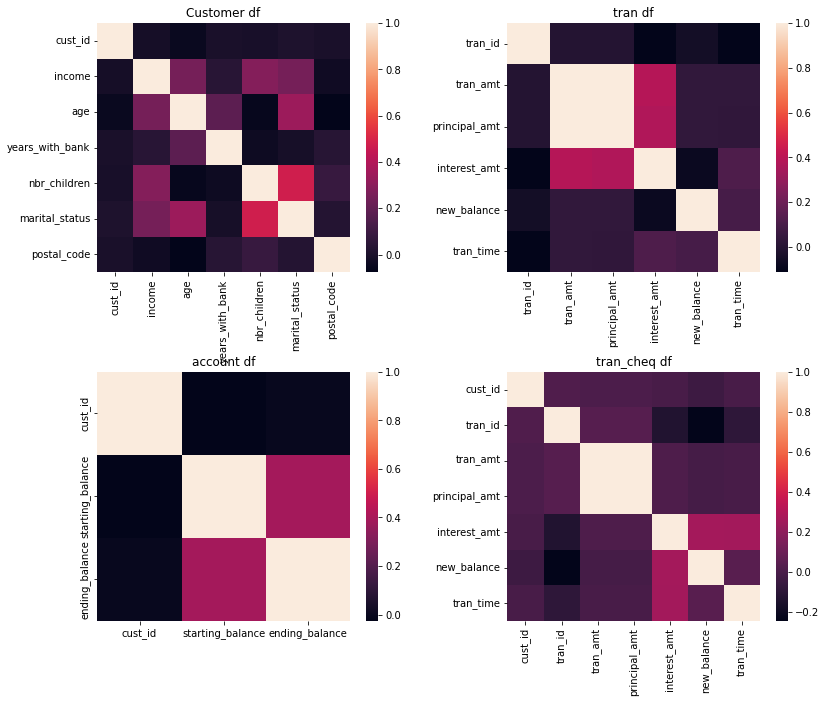

In [3]:
fig, axes = plt.subplots(2,2,figsize=(13,11))
sns.heatmap(cust.corr(),ax=axes[0,0])
axes[0,0].set_title('Customer df')
sns.heatmap(tran.corr(),ax=axes[0,1])
axes[0,1].set_title('tran df')
sns.heatmap(acc.corr(),ax=axes[1,0])
axes[1,0].set_title('account df')
sns.heatmap(tran_cheq.corr(),ax=axes[1,1])
axes[1,1].set_title('tran_cheq df')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

<AxesSubplot: xlabel='principal_amt', ylabel='tran_amt'>

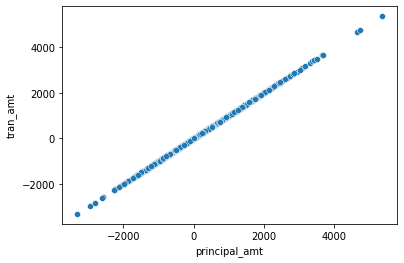

In [4]:
sns.scatterplot(x=tran_cheq['principal_amt'], y=tran_cheq['tran_amt'])

<AxesSubplot: xlabel='principal_amt', ylabel='tran_amt'>

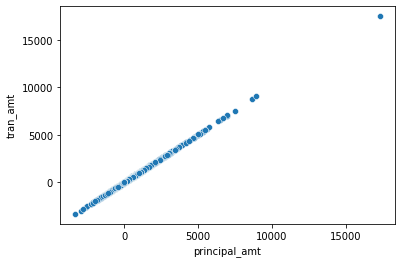

In [5]:
sns.scatterplot(x=tran['principal_amt'], y=tran['tran_amt'])

tran df
-One very high principal amount and transaction amount 

tran_cheq
-after around ~4000 there is a decent gap

In [6]:
acc_cust_combo = acc.merge(cust, on='cust_id',how='outer')
acc_cust_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   object 
 1   cust_id           1491 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   starting_balance  1409 non-null   float64
 4   ending_balance    1409 non-null   float64
 5   income            1491 non-null   int64  
 6   age               1491 non-null   int64  
 7   years_with_bank   1491 non-null   int64  
 8   nbr_children      1491 non-null   int64  
 9   gender            1491 non-null   object 
 10  marital_status    1491 non-null   int64  
 11  name_prefix       1491 non-null   object 
 12  postal_code       1491 non-null   int64  
 13  city_name         1491 non-null   object 
 14  state_code        1491 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 186.4+ KB


82 Customers do not have an account number. There is a value for their years with the bank? Not sure how to go about this as they are with the bank but the bank never assigned them an account number.

In [88]:
acc_cust_combo = acc.merge(cust,on='cust_id',how='inner')
acc_cust_combo

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
0,13628063,1362806,SV,1430.22,284.58,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
1,13628062,1362806,CK,218.47,2561.24,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
2,13628060,1362806,CC,214.46,1541.64,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
3,13627090,1362709,CC,266.34,496.15,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA
4,13627093,1362709,SV,134.28,917.33,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,13630440,1363044,CC,150.30,523.08,15895,46,6,1,F,2,,20126,Washington,DC
1405,13627140,1362714,CC,175.29,457.29,14458,49,9,0,F,2,Ms.,46256,Indianapolis,IN
1406,13626683,1362668,SV,213.91,1470.67,0,13,5,0,M,1,,90750,Long Beach,CA
1407,13628933,1362893,SV,290.57,976.43,0,15,7,0,M,1,,97248,Portland,OR


C:\Users\John\AppData\Local\Temp\ipykernel_26144\3526454516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(acc_cust_combo.corr())


<AxesSubplot: >

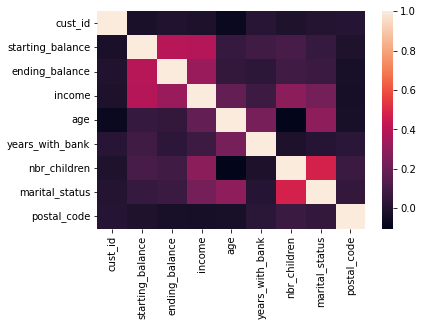

In [8]:
sns.heatmap(acc_cust_combo.corr())

Ending balance/starting balance, income/starting balance, ending balance/income are some minor correlations

In [9]:
main_3_df = acc_cust_combo.merge(tran, how='outer', on='acct_nbr') #77592 rows for outer. 77560 for inner, I feel like 32 rows should be okay to exclude
main_3_df

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,...,city_name,state_code,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
0,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,39.0,0.00,0.00,0.0,283.87,1995-12-30,11.0,IQ
1,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,37.0,72.82,72.82,0.0,199.71,1995-12-28,13.0,DP
2,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,35.0,-186.89,-186.89,0.0,186.89,1995-12-28,12.0,TR
3,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,33.0,-80.00,-80.00,0.0,618.17,1995-12-26,18.0,WD
4,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,31.0,0.00,0.00,0.0,201.82,1995-12-22,14.0,IQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77587,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,200.00,200.00,0.0,7500.23,1995-02-10,23.0,WD
77588,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,200.00,200.00,0.0,7700.23,1995-02-09,17.0,WD
77589,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,200.00,200.00,0.0,7900.23,1995-02-08,11.0,WD
77590,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,200.00,200.00,0.0,8100.23,1995-02-07,22.0,WD


In [10]:
main_3_df['acct_nbr'].nunique()

1410

A new account number was added after the merge. acct_nbr == 1376137423. Unsure if it is possible to relate it to a customer id through tran_id/date? -> After checking the other transaction tables, it does not seem like thats possible. 

From my understanding, 
starting_balance = balance at the beginning of the year
ending_balance = final balance at the end of the year
new_balance = balance at that current time 
-> create a new column balance_diff which is ending_balance - starting_balance and check for people who GAINED or LOST money through this year in original acc_cust_combo df

In [11]:
tran[tran['acct_nbr'] == '1376137423'].sort_values('tran_date')

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
13297,1,1376137423,200.0,200.0,0.0,9500.23,1995-01-31,23.0,WD
10519,2,1376137423,200.0,200.0,0.0,9300.23,1995-02-01,13.0,WD
7618,3,1376137423,200.0,200.0,0.0,9100.23,1995-02-02,6.0,WD
5140,4,1376137423,200.0,200.0,0.0,8900.23,1995-02-03,6.0,WD
2717,5,1376137423,200.0,200.0,0.0,8700.23,1995-02-04,16.0,WD
39,6,1376137423,200.0,200.0,0.0,8500.23,1995-02-05,12.0,WD
74912,7,1376137423,200.0,200.0,0.0,8300.23,1995-02-06,23.0,WD
72398,8,1376137423,200.0,200.0,0.0,8100.23,1995-02-07,22.0,WD
69857,9,1376137423,200.0,200.0,0.0,7900.23,1995-02-08,11.0,WD
67235,10,1376137423,200.0,200.0,0.0,7700.23,1995-02-09,17.0,WD


In [12]:
tran_cheq[(tran_cheq['tran_id'] == 20) & (tran_cheq['tran_code'] == 'WD') & (tran_cheq['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
7395,1363200,20,-363.14,-363.14,0.0,782.47,1995-02-23,12.0,WD
26967,1362568,20,-175.96,-175.96,0.0,3329.74,1995-10-02,12.0,WD
34407,1362758,20,-258.02,-258.02,0.0,1050.02,1995-01-20,12.0,WD


In [13]:
tran_save[(tran_save['tran_id'] == 20) & (tran_save['tran_code'] == 'WD') & (tran_save['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
4455,1363452,20,-99.66,-99.66,0.0,2115.35,1995-12-29,12.0,WD
4853,1363158,20,-295.15,-295.15,0.0,1844.49,1995-12-24,12.0,WD


In [14]:
tran_cred[(tran_cred['tran_id'] == 20) & (tran_cred['tran_code'] == 'WD') & (tran_cred['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code


C:\Users\John\AppData\Local\Temp\ipykernel_26144\556321990.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_3_df.corr())


<AxesSubplot: >

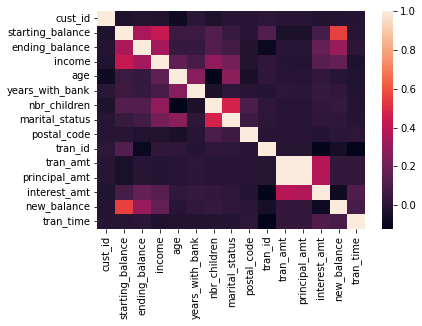

In [15]:
sns.heatmap(main_3_df.corr())

Very high correlation between new_balance and starting_balance

<AxesSubplot: xlabel='new_balance', ylabel='starting_balance'>

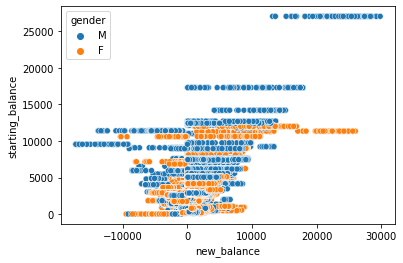

In [16]:
sns.scatterplot(x=main_3_df['new_balance'], y=main_3_df['starting_balance'],hue=main_3_df['gender'])

In [93]:
acc_cust_combo['balance_diff'] = acc_cust_combo['ending_balance'] - acc_cust_combo['starting_balance']
acc_cust_combo

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code,number_cheq_trans,number_of_cred_trans,number_of_save_trans,balance_diff
0,13628063,1362806,SV,1430.22,284.58,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,-1145.64
1,13628062,1362806,CK,218.47,2561.24,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,2342.77
2,13628060,1362806,CC,214.46,1541.64,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,1327.18
3,13627090,1362709,CC,266.34,496.15,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,99.0,55.0,40.0,229.81
4,13627093,1362709,SV,134.28,917.33,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,99.0,55.0,40.0,783.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,13630440,1363044,CC,150.30,523.08,15895,46,6,1,F,2,,20126,Washington,DC,NaN,47.0,NaN,372.78
1405,13627140,1362714,CC,175.29,457.29,14458,49,9,0,F,2,Ms.,46256,Indianapolis,IN,NaN,60.0,NaN,282.00
1406,13626683,1362668,SV,213.91,1470.67,0,13,5,0,M,1,,90750,Long Beach,CA,NaN,NaN,40.0,1256.76
1407,13628933,1362893,SV,290.57,976.43,0,15,7,0,M,1,,97248,Portland,OR,NaN,NaN,22.0,685.86


C:\Users\John\AppData\Local\Temp\ipykernel_26144\3526454516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(acc_cust_combo.corr())


<AxesSubplot: >

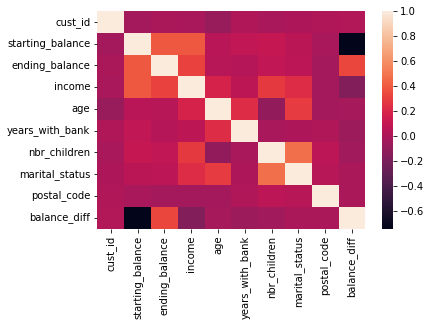

In [18]:
sns.heatmap(acc_cust_combo.corr())

In [19]:
#sns.pairplot(data=acc_cust_combo, corner=True) #Not much information can really be seen from the pairplot ~10secs to load it

<AxesSubplot: ylabel='Count'>

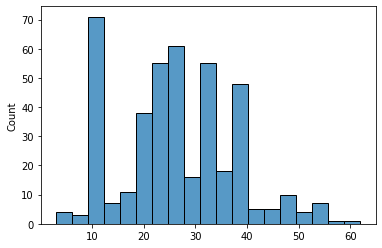

In [20]:
sns.histplot(tran_save.groupby('cust_id').size()) # Number of savings transactions

<AxesSubplot: ylabel='Count'>

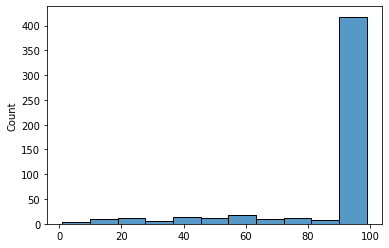

In [21]:
sns.histplot(tran_cheq.groupby('cust_id').size()) # Number of chequing transactions 

In [22]:
tran_cheq.groupby('cust_id').size().mode() # account limit of 99??

0    99
dtype: int64

<AxesSubplot: ylabel='Count'>

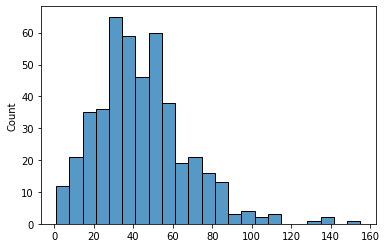

In [23]:
sns.histplot(tran_cred.groupby('cust_id').size()) # Number of credit transactions 

In [24]:
tran_cred.groupby('cust_id').size().sort_values(ascending=False)

cust_id
1363002    155
1362683    141
1362777    137
1363249    131
1362978    112
          ... 
1363237      1
1363133      1
1363146      1
1362619      1
1363169      1
Length: 457, dtype: int64

In [25]:
tran_cred[tran_cred['cust_id'] == 1363002].describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,155.0,155.000000,155.000000,155.000000,155.000000,155.000000,142.000000
mean,1363002.0,78.000000,-3.835355,-5.530645,1.697613,-3483.289355,13.302817
std,0.0,44.888751,929.295373,923.861746,6.550585,1424.592885,5.509488
min,1363002.0,1.000000,-946.120000,-946.120000,0.000000,-6100.000000,3.000000
25%,1363002.0,39.500000,-343.075000,-343.075000,0.000000,-4554.680000,10.000000
50%,1363002.0,78.000000,-189.210000,-189.210000,0.000000,-3479.090000,13.000000
75%,1363002.0,116.500000,-63.930000,-63.930000,0.000000,-2576.900000,18.000000
max,1363002.0,155.000000,5473.310000,5448.890000,38.940000,-50.500000,23.000000


cust_id 1363002 with the most transactions is interesting. The new_balance never goes out of the negatives and has a large difference in the transaction amounts

In [26]:
acc_cred[acc_cred['cust_id'] == 1363002]

,cust_id,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance
414,1363002,13630020,6100,0,1827.21,2684.46


<AxesSubplot: xlabel='income', ylabel='Count'>

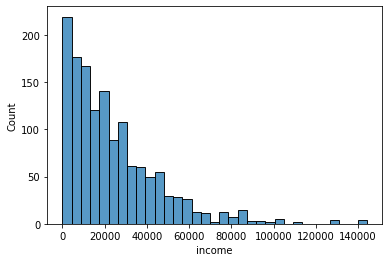

In [27]:
sns.histplot(acc_cust_combo['income'])

Text(0.5, 1.0, 'Number of transactions for credit accounts')

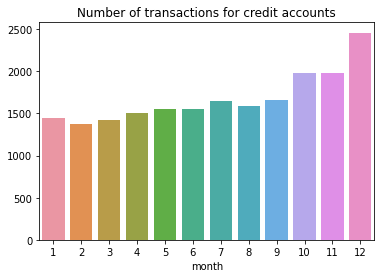

In [28]:
tran_cred['month'] = tran_cred['tran_date'].dt.month
sns.barplot(x=tran_cred.groupby('month').size().index, y=tran_cred.groupby('month').size())
plt.title('Number of transactions for credit accounts')

Text(0.5, 1.0, 'Number of transactions for chequing accounts')

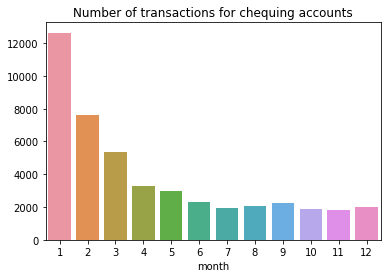

In [29]:
tran_cheq['month'] = tran_cheq['tran_date'].dt.month
sns.barplot(x=tran_cheq.groupby('month').size().index, y=tran_cheq.groupby('month').size())
plt.title('Number of transactions for chequing accounts')

Text(0.5, 1.0, 'Number of transactions for savings accounts')

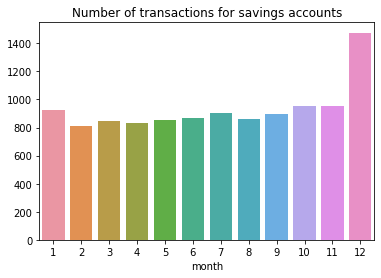

In [30]:
tran_save['month'] = tran_save['tran_date'].dt.month
sns.barplot(x=tran_save.groupby('month').size().index, y=tran_save.groupby('month').size())
plt.title('Number of transactions for savings accounts')

Text(0.5, 1.0, 'Total number transactions for all accounts')

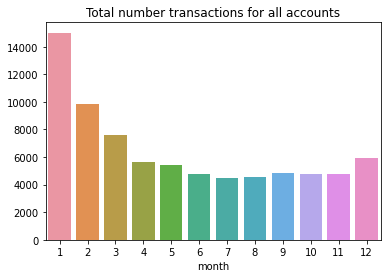

In [31]:
tran['month'] = tran['tran_date'].dt.month
sns.barplot(x=tran.groupby('month').size().index, y=tran.groupby('month').size())
plt.title('Total number transactions for all accounts')

In [32]:
tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,12.0,IQ,10
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,15.0,IQ,2
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,NaN,WD,7
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,NaN,FK,1
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,20.0,IQ,1
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,1995-02-14,16.0,TR,2
77576,94,13626772,-93.90,-93.90,0.0,824.36,1995-03-11,NaN,WD,3
77577,42,13625262,-10.35,-10.35,0.0,10.36,1995-08-26,NaN,WD,8
77578,98,13627052,-423.80,-423.80,0.0,162.28,1995-06-13,11.0,WD,6


In [33]:
tran_save.shape[0] + tran_cheq.shape[0] + tran_cred.shape[0]
#The addition of all subcategories from tran does not add up to tran (77560 vs 77580)

77560

In [37]:
all_save = tran_save.merge(acc_save,how='inner',on='cust_id') # Joining by outer adds one null row, probably easiest to just do an inner as its just one data row
all_save


,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
0,1363481,26,136.03,136.03,0.00,1521.57,1995-10-26,8.0,DP,10,13634813,100,BS,155.93,1606.92
1,1363481,22,1.50,0.00,1.50,1202.71,1995-08-31,23.0,IN,8,13634813,100,BS,155.93,1606.92
2,1363481,18,294.55,294.55,0.00,1279.21,1995-08-18,13.0,DP,8,13634813,100,BS,155.93,1606.92
3,1363481,14,0.00,0.00,0.00,1062.10,1995-06-28,12.0,IQ,6,13634813,100,BS,155.93,1606.92
4,1363481,10,139.83,139.83,0.00,669.75,1995-05-20,18.0,DP,5,13634813,100,BS,155.93,1606.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11184,1362621,19,-80.00,-80.00,0.00,1395.74,1995-12-19,19.0,WD,12,13626213,500,MM,727.98,1498.40
11185,1362621,16,35.25,35.25,0.00,1204.48,1995-11-30,20.0,DP,11,13626213,500,MM,727.98,1498.40
11186,1362621,21,3.74,0.00,3.74,1498.40,1995-12-31,23.0,IN,12,13626213,500,MM,727.98,1498.40
11187,1362621,18,268.25,268.25,0.00,1475.74,1995-12-11,19.0,DP,12,13626213,500,MM,727.98,1498.40


C:\Users\John\AppData\Local\Temp\ipykernel_26144\496179648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_save.corr())


<AxesSubplot: >

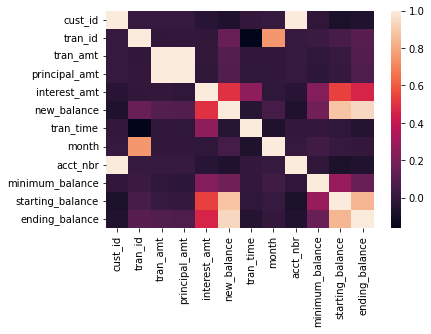

In [38]:
sns.heatmap(all_save.corr())

In [39]:
all_cred = tran_cred.merge(acc_cred,how='inner',on='cust_id') # Outer join creates 11 new null rows, can probably do an inner as its a tiny addition
all_cred

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance
0,1363088,46,-121.49,-121.49,0.00,-141.00,1995-10-20,10.0,CG,10,13630880,1400,0,189.64,739.86
1,1363088,19,-165.45,-165.45,0.00,-552.15,1995-04-16,21.0,CG,4,13630880,1400,0,189.64,739.86
2,1363088,41,862.42,862.42,0.00,0.00,1995-09-06,NaN,PM,9,13630880,1400,0,189.64,739.86
3,1363088,14,-133.52,-133.52,0.00,-133.52,1995-04-02,12.0,CG,4,13630880,1400,0,189.64,739.86
4,1363088,36,-186.32,-186.32,0.00,-386.97,1995-08-08,12.0,CG,8,13630880,1400,0,189.64,739.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20162,1362598,5,-20.00,-20.00,0.00,-386.34,1995-05-01,23.0,FA,5,13625980,2500,0,1801.88,20.00
20163,1362598,4,208.76,200.77,7.99,-366.34,1995-04-07,NaN,PM,4,13625980,2500,0,1801.88,20.00
20164,1362598,3,563.45,547.75,15.70,-567.11,1995-03-04,NaN,PM,3,13625980,2500,0,1801.88,20.00
20165,1362598,2,507.52,484.99,22.53,-1114.86,1995-02-05,NaN,PM,2,13625980,2500,0,1801.88,20.00


C:\Users\John\AppData\Local\Temp\ipykernel_26144\4108578632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_cred.corr())


<AxesSubplot: >

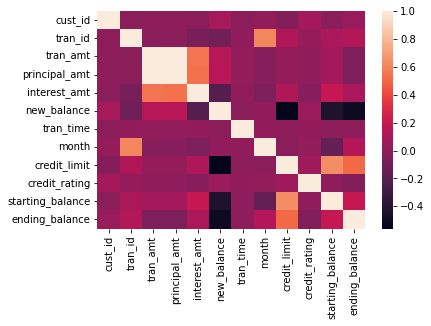

In [40]:
sns.heatmap(all_cred.corr())

In [41]:
all_cheq = tran_cheq.merge(acc_cheq, on='cust_id',how='outer') #No difference between an outer or inner join! 
all_cheq

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month,acct_nbr,minimum_balance,per_check_fee,starting_balance,ending_balance
0,1363481,26,-0.15,-0.15,0.0,58.99,1995-01-29,NaN,FK,1,13634812,100,0.15,202.56,25.94
1,1363481,75,-141.09,-141.09,0.0,236.98,1995-03-04,NaN,WD,3,13634812,100,0.15,202.56,25.94
2,1363481,22,-0.15,-0.15,0.0,321.23,1995-01-24,NaN,FK,1,13634812,100,0.15,202.56,25.94
3,1363481,71,-19.48,-19.48,0.0,183.00,1995-02-28,NaN,WD,2,13634812,100,0.15,202.56,25.94
4,1363481,18,-0.15,-0.15,0.0,126.81,1995-01-21,NaN,FK,1,13634812,100,0.15,202.56,25.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46199,1363222,93,302.25,302.25,0.0,398.52,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81
46200,1363222,96,731.65,731.65,0.0,831.28,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81
46201,1363222,97,-32.25,-32.25,0.0,799.03,1995-12-21,9.0,WD,12,13632222,100,0.15,189.85,839.81
46202,1363222,98,40.78,40.78,0.0,839.81,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81


C:\Users\John\AppData\Local\Temp\ipykernel_26144\3168727723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_cheq.corr())


<AxesSubplot: >

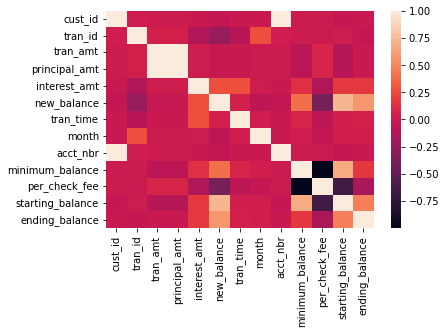

In [42]:
sns.heatmap(all_cheq.corr())

In [44]:
main_3_df

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,...,city_name,state_code,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
0,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,39.0,0.00,0.00,0.0,283.87,1995-12-30,11.0,IQ
1,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,37.0,72.82,72.82,0.0,199.71,1995-12-28,13.0,DP
2,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,35.0,-186.89,-186.89,0.0,186.89,1995-12-28,12.0,TR
3,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,33.0,-80.00,-80.00,0.0,618.17,1995-12-26,18.0,WD
4,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,31.0,0.00,0.00,0.0,201.82,1995-12-22,14.0,IQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77587,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,200.00,200.00,0.0,7500.23,1995-02-10,23.0,WD
77588,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,200.00,200.00,0.0,7700.23,1995-02-09,17.0,WD
77589,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,200.00,200.00,0.0,7900.23,1995-02-08,11.0,WD
77590,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,200.00,200.00,0.0,8100.23,1995-02-07,22.0,WD


In [56]:
all_cheq

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,month,acct_nbr,minimum_balance,per_check_fee,starting_balance,ending_balance
0,1363481,26,-0.15,-0.15,0.0,58.99,1995-01-29,NaN,FK,1,13634812,100,0.15,202.56,25.94
1,1363481,75,-141.09,-141.09,0.0,236.98,1995-03-04,NaN,WD,3,13634812,100,0.15,202.56,25.94
2,1363481,22,-0.15,-0.15,0.0,321.23,1995-01-24,NaN,FK,1,13634812,100,0.15,202.56,25.94
3,1363481,71,-19.48,-19.48,0.0,183.00,1995-02-28,NaN,WD,2,13634812,100,0.15,202.56,25.94
4,1363481,18,-0.15,-0.15,0.0,126.81,1995-01-21,NaN,FK,1,13634812,100,0.15,202.56,25.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46199,1363222,93,302.25,302.25,0.0,398.52,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81
46200,1363222,96,731.65,731.65,0.0,831.28,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81
46201,1363222,97,-32.25,-32.25,0.0,799.03,1995-12-21,9.0,WD,12,13632222,100,0.15,189.85,839.81
46202,1363222,98,40.78,40.78,0.0,839.81,1995-12-21,9.0,DP,12,13632222,100,0.15,189.85,839.81


In [89]:
# Add the number of chequing transactions to the acc_cust_combo
cheq_size = all_cheq.groupby('cust_id',as_index=False).size()
acc_cust_combo = acc_cust_combo.merge(cheq_size, how='outer', on='cust_id')
acc_cust_combo = acc_cust_combo.rename(columns={'size': 'number_cheq_trans'})


In [90]:
# Add the number of credit transactions to the acc_cust_combo
cred_size = all_cred.groupby('cust_id',as_index=False).size()
acc_cust_combo = acc_cust_combo.merge(cred_size, how='outer', on='cust_id')
acc_cust_combo = acc_cust_combo.rename(columns={'size': 'number_of_cred_trans'})

In [91]:
# Add the number of savings transactions to the acc_cust_combo
save_size = all_save.groupby('cust_id',as_index=False).size()
acc_cust_combo = acc_cust_combo.merge(save_size, how='outer', on='cust_id')
acc_cust_combo = acc_cust_combo.rename(columns={'size': 'number_of_save_trans'})

In [101]:
acc_cust_combo = acc_cust_combo.fillna({'number_cheq_trans':0,'number_of_cred_trans':0,'number_of_save_trans':0})

In [102]:
acc_cust_combo

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code,number_cheq_trans,number_of_cred_trans,number_of_save_trans,balance_diff
0,13628063,1362806,SV,1430.22,284.58,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,-1145.64
1,13628062,1362806,CK,218.47,2561.24,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,2342.77
2,13628060,1362806,CC,214.46,1541.64,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,99.0,69.0,40.0,1327.18
3,13627090,1362709,CC,266.34,496.15,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,99.0,55.0,40.0,229.81
4,13627093,1362709,SV,134.28,917.33,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,99.0,55.0,40.0,783.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,13630440,1363044,CC,150.30,523.08,15895,46,6,1,F,2,,20126,Washington,DC,0.0,47.0,0.0,372.78
1405,13627140,1362714,CC,175.29,457.29,14458,49,9,0,F,2,Ms.,46256,Indianapolis,IN,0.0,60.0,0.0,282.00
1406,13626683,1362668,SV,213.91,1470.67,0,13,5,0,M,1,,90750,Long Beach,CA,0.0,0.0,40.0,1256.76
1407,13628933,1362893,SV,290.57,976.43,0,15,7,0,M,1,,97248,Portland,OR,0.0,0.0,22.0,685.86


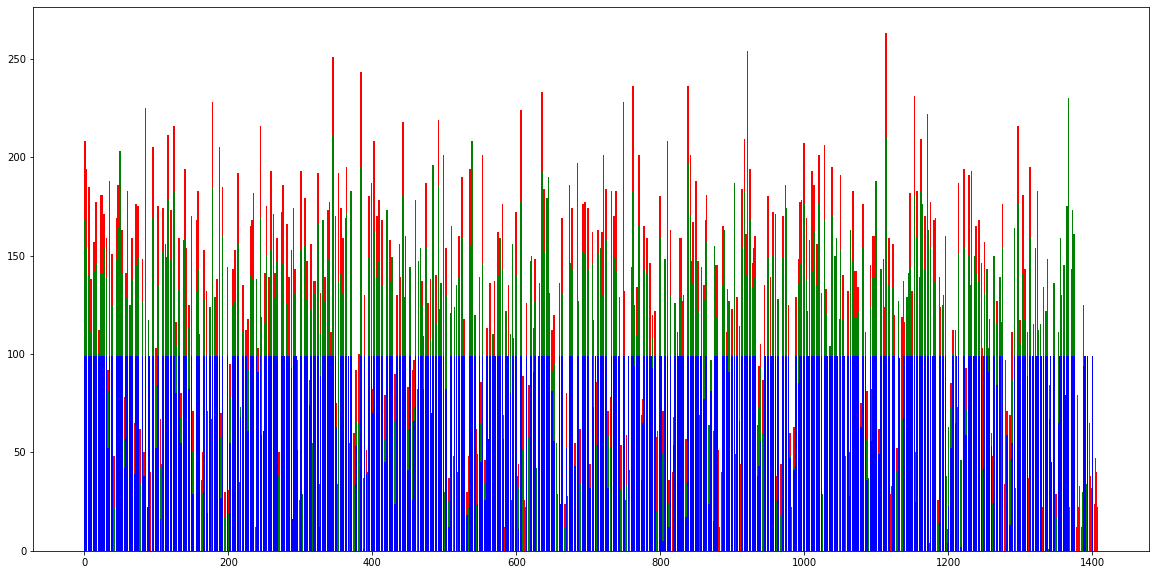

In [112]:
#Stacked bar chart of each customers type and number of transactions -> pretty ugly, should find a new way to portray it. 
bars1 = acc_cust_combo['number_cheq_trans']
bars2 = acc_cust_combo['number_of_cred_trans']
bars3 = acc_cust_combo['number_of_save_trans']
bars = np.add(bars1,bars2).tolist()
r=np.arange(len(bars1))
plt.figure(figsize=(20,10))
plt.bar(r,bars1,color='b')
plt.bar(r,bars2,bottom=bars1,color='g')
plt.bar(r,bars3,bottom=bars,color='r')
plt.show()